## Household Electricity Consumption 
- Decision Tree, Bagging , Random Forest

![](https://i.imgur.com/B0DSlwb.jpg)

### Problem Statement
- Predict the household power counsumtion

### Task Peformed:
1. Load Data
2. Exploratory data analysis
3. Check and remove any special character
4. Handle the null Values
5. Graphical Analysis
6. Check and Handle the outliers
7. Train Test Split
8. Model building for :
	- Linear Regression
	- Ridge Regression
	- Lasso Regression
	- Support Vector Regression
	- Decision Tree Regressor
	- Random Forest Regressor
	- Bagging Regressor
9. check for all models:
	- mean_squared_error
	- mean_absolute_error
	- r2_score
	- Adjusted r2_score
10. Hyper-Parameter tuning using RandomSearchCV on:
	- Random Forest Regessor
	- Bagging Regressor
11. Summary
12. Store the best model in pickle file

### Description
- The dataset is collected from UCI website, provided by Senior Researchers from France.
- More then 2 million records
- Data of 47 months ranging from December 2006 to November 2010.
- Dataset has 9 attributes, out of which 3 are meter readings stating how much electricity unit appliances of various type has consumed.


### Importing required libraries

In [16]:
# Data Analysing 
import pandas as pd
import numpy as np

# Graphical analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for model building
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Database
import pymongo

# save the model
import pickle


### Load dataset

In [17]:
df = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\Dataset\household_power_consumption.txt",sep=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [18]:
df.shape

(2075259, 9)

- Data is very big so we have to take small sample for model building

In [19]:
df_sample = df.sample(60000)

In [20]:
df_sample.shape

(60000, 9)

- We have taken 60000 samples out of 2 million to build model

### EDA

In [21]:
df_sample.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

#### Drop Date and time columns

In [22]:
df_sample.drop(['Date','Time'],axis = 1, inplace = True)

In [23]:
df_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1334516,1.680,0.242,240.250,7.400,0.000,0.000,19.0
834531,1.346,0.000,240.080,5.600,0.000,0.000,19.0
2039045,1.49,0.218,240.84,6.2,0.0,1.0,19.0
1197023,0.500,0.242,246.600,2.400,0.000,2.000,0.0
1992121,0.502,0.000,243.140,2.000,0.000,0.000,1.0


#### Check any special character

In [24]:
special_char = df_sample[df_sample['Voltage'] == "?"]
special_char

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1713110,?,?,?,?,?,?,NaN
1929951,?,?,?,?,?,?,NaN
191104,?,?,?,?,?,?,NaN
1714427,?,?,?,?,?,?,NaN
1309659,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...
192591,?,?,?,?,?,?,NaN
1936886,?,?,?,?,?,?,NaN
192760,?,?,?,?,?,?,NaN
1714192,?,?,?,?,?,?,NaN


#### Drop these records having special character

In [25]:
print("Data before special characters", df_sample.shape)
df_sample.drop(special_char.index,axis= 0,inplace=True)
print("Data before removal of special characters", df_sample.shape)

Data before special characters (60000, 7)
Data before removal of special characters (59237, 7)


#### Check duplicated

In [26]:
df_sample.duplicated().sum()

267

In [27]:
print("Data before duplicate records", df_sample.shape)
df_sample.drop_duplicates(inplace=True)
print("Data after removal of duplicate records", df_sample.shape)

Data before duplicate records (59237, 7)
Data after removal of duplicate records (58970, 7)


#### Check the null values

In [28]:
df_sample.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

- no null values

#### Convert all dtypes to float

In [29]:
df_sample.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [30]:
df_sample = df_sample.astype(float)

In [31]:
df_sample.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

#### Combine reading of sub_metering_1,sub_metering_2 and sub_metering_3

In [32]:
df_sample.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [33]:
df_sample['meter'] =df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'] + df_sample['Sub_metering_3']

#### Drop 3 columns

In [34]:
df_sample.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis = 1,inplace = True)

In [35]:
df_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meter
1334516,1.680,0.242,240.25,7.4,19.0
834531,1.346,0.000,240.08,5.6,19.0
2039045,1.490,0.218,240.84,6.2,20.0
1197023,0.500,0.242,246.60,2.4,2.0
1992121,0.502,0.000,243.14,2.0,1.0


In [36]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,58970.0,1.087799,1.048202,0.078,0.31,0.602,1.526,10.536
Global_reactive_power,58970.0,0.125017,0.112689,0.000,0.05,0.102,0.196,1.148
Voltage,58970.0,240.842481,3.240869,223.990,238.99,241.010,242.890,253.430
Global_intensity,58970.0,4.613715,4.404747,0.200,1.40,2.600,6.400,45.800
meter,58970.0,8.807919,12.788774,0.000,0.00,1.000,18.000,129.000


#### Graphical Representation

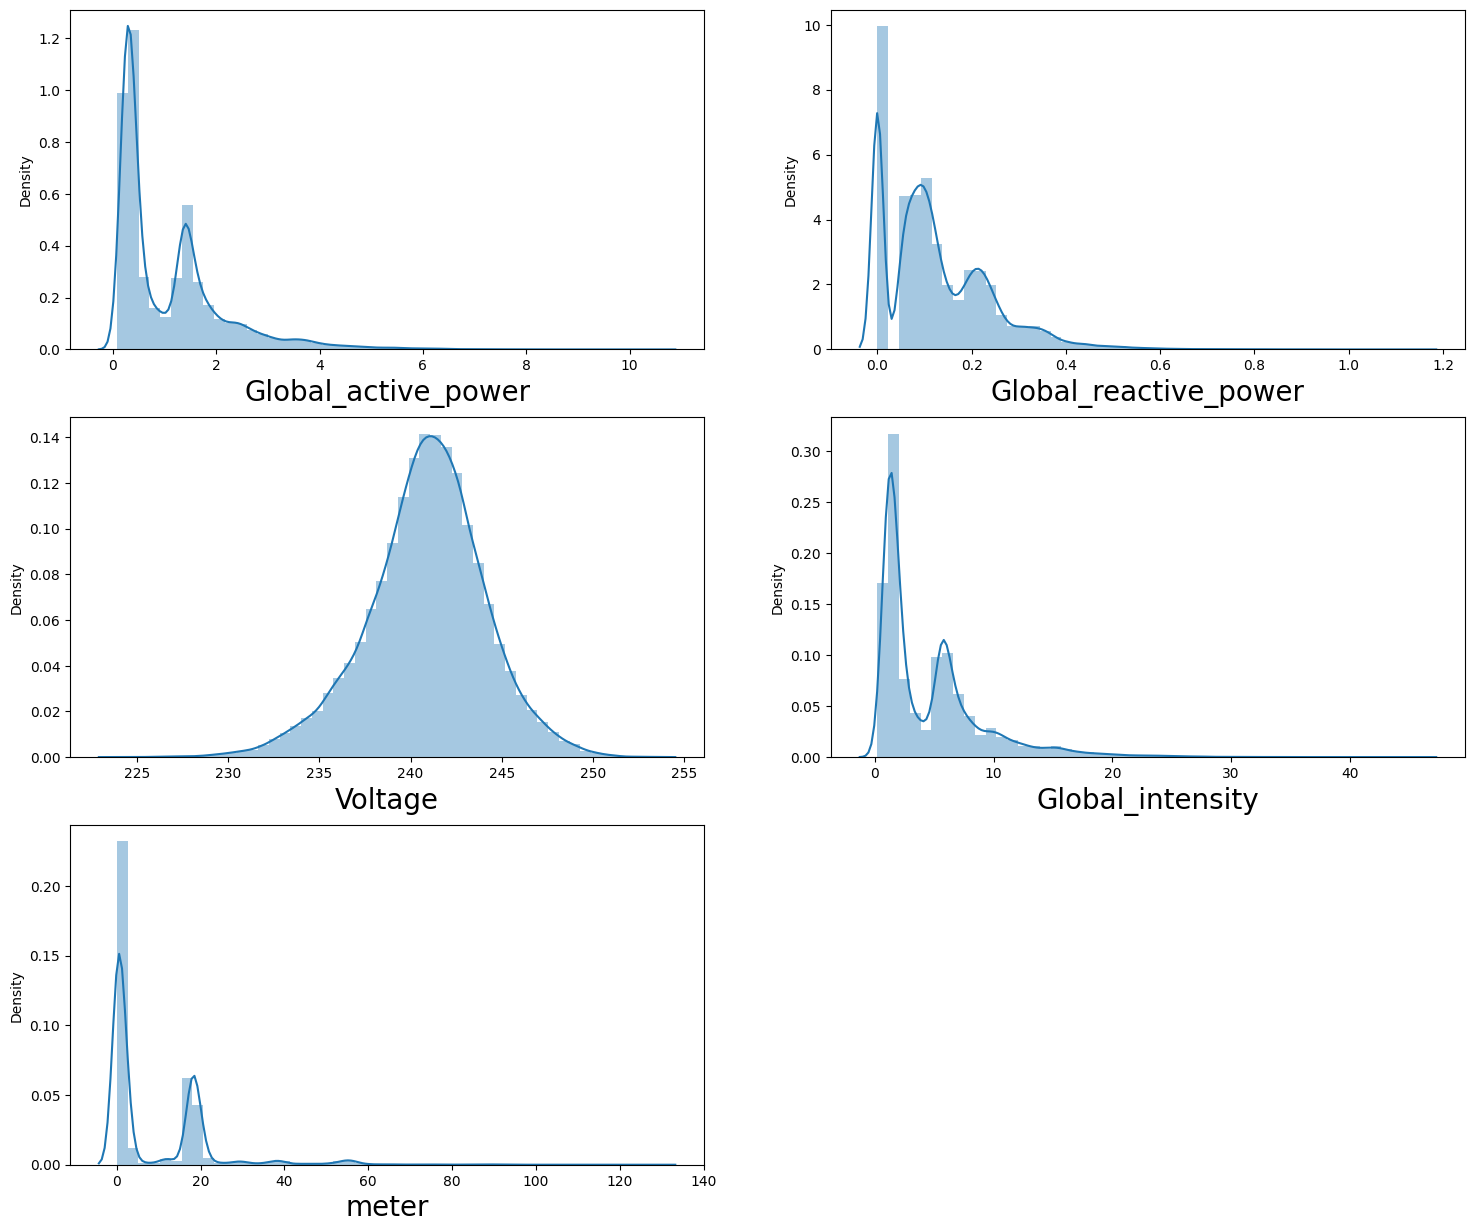

In [37]:
# Let's see data distribution in each column
plt.figure(figsize=(18,15), facecolor='white')
plotnumber = 1

for column in df_sample.columns[:]:
    if plotnumber<=5 :
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df_sample[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Check the outliers

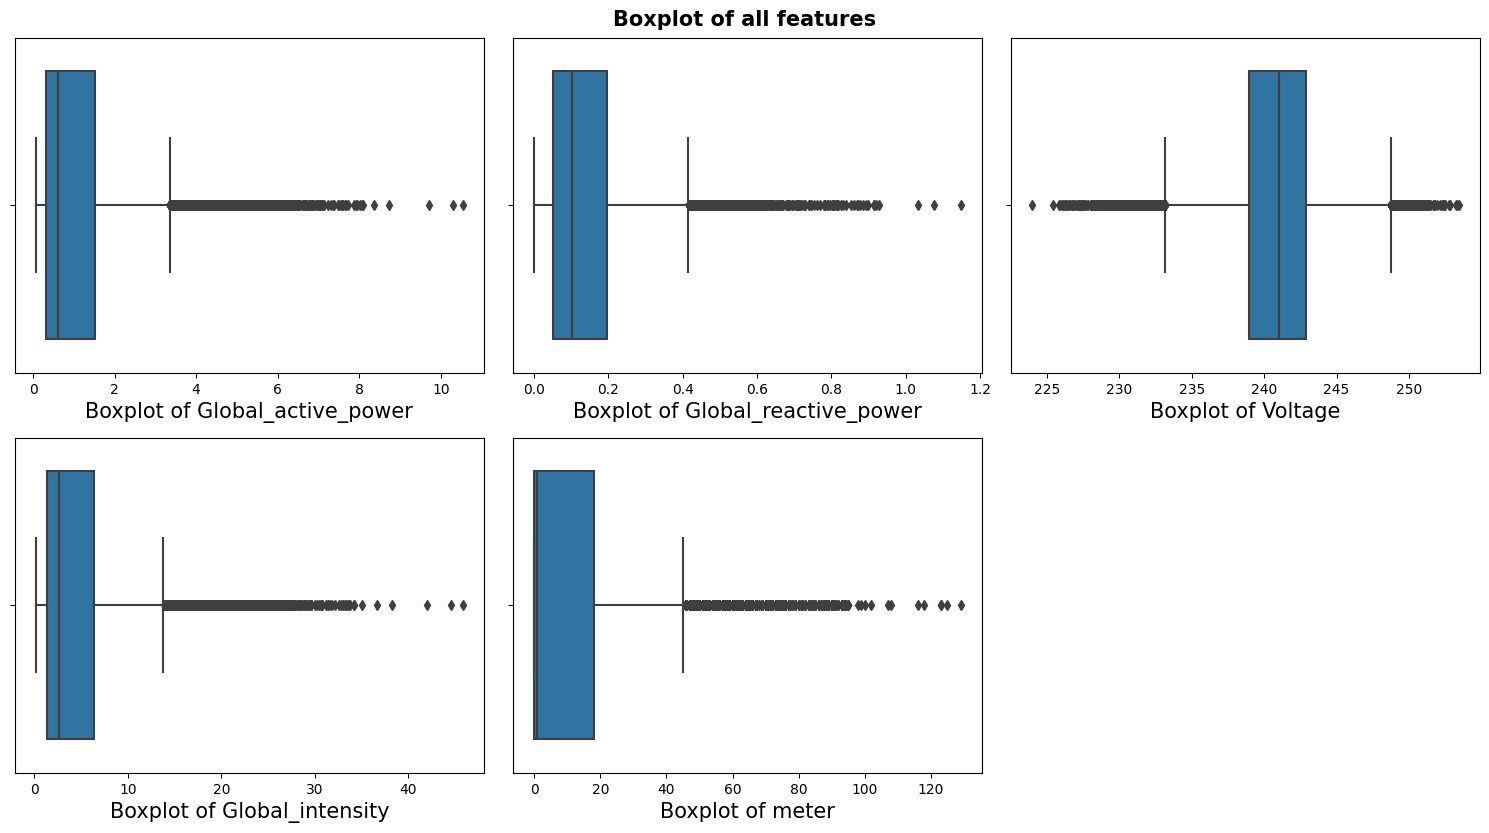

In [38]:
plt.figure(figsize=(15,20),facecolor='White')
plt.suptitle("Boxplot of all features", fontweight = 'bold', fontsize = 15,y = 0.989)
for i in range(0,len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = df_sample.columns[i], data = df_sample)
    plt.xlabel("Boxplot of {}".format(df_sample.columns[i]),fontsize = 15)
    plt.tight_layout()

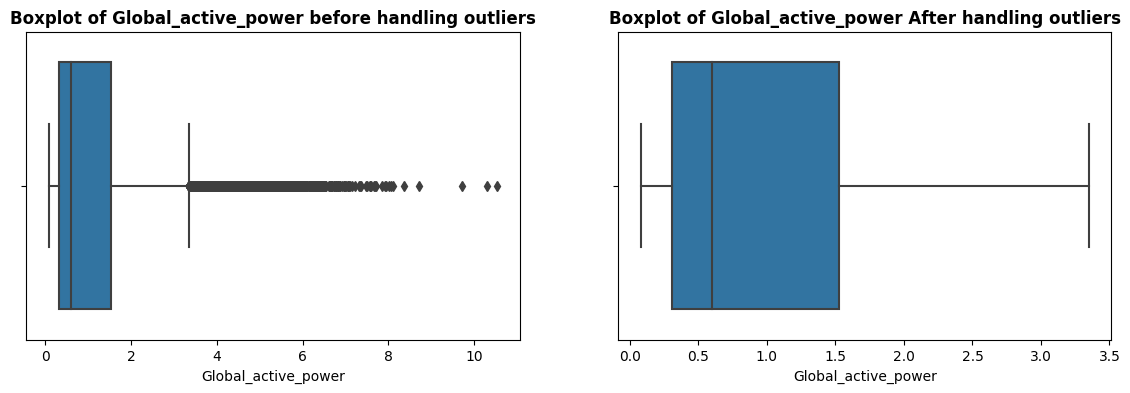

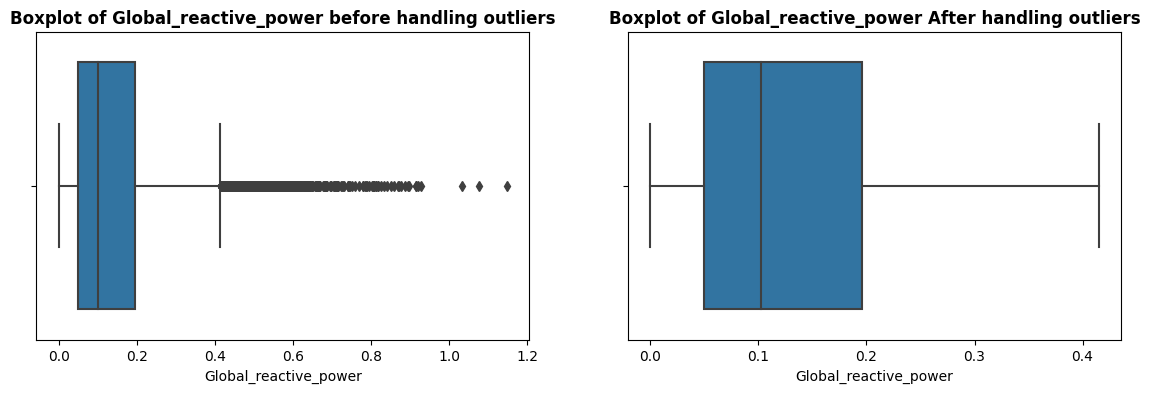

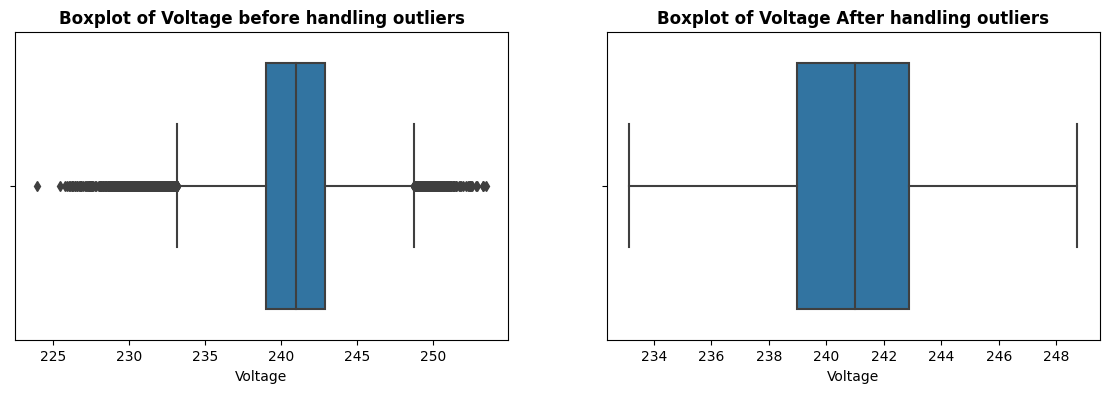

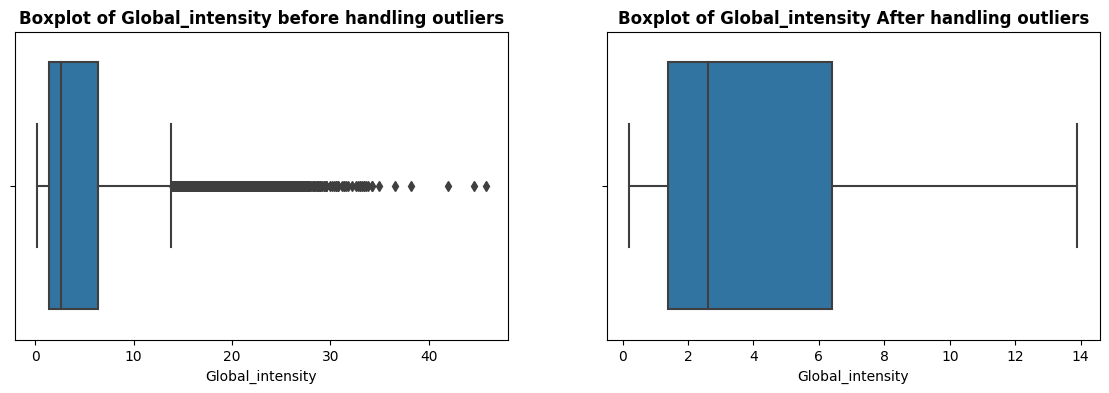

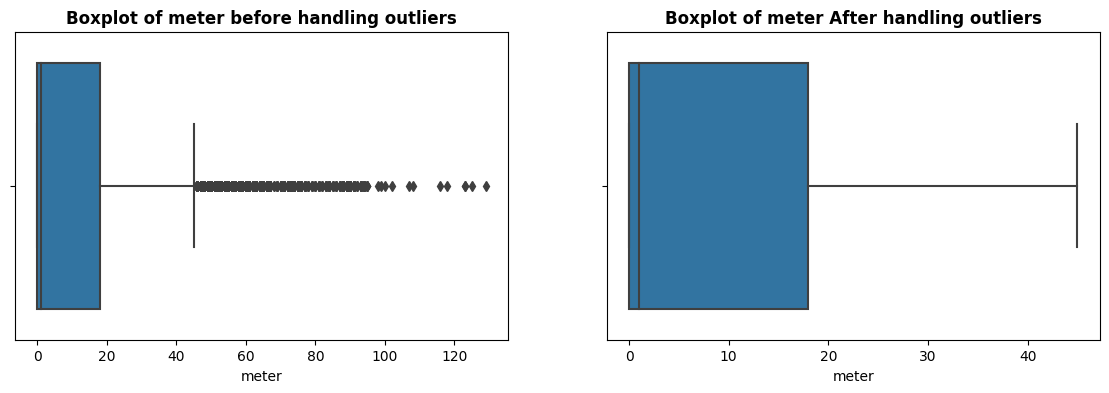

In [39]:
# Handling the outliers
df1 = df_sample.copy()
feature_to_use = df1.columns

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.boxplot(x = fea, data = df_sample)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()

#### Seperate Independent and Dependent Features

In [40]:
x = df1.iloc[:,:-1]
y = df1['meter']

In [41]:
x.shape,y.shape

((58970, 4), (58970,))

#### Train Test Split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42 )

In [43]:
x_train.shape,y_train.shape

((39509, 4), (39509,))

In [44]:
x_test.shape,y_test.shape

((19461, 4), (19461,))

#### Standardization

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Model Building

In [46]:
report = []

In [87]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "Support Vector Regression" : SVR(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)   # Training Model

    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training Data perfomance Matrix
    model_train_mse = mean_squared_error(y_train,y_train_pred)   # Calculate MSE
    model_train_mae = mean_absolute_error(y_train,y_train_pred)  # Calculate MAE
    model_train_r2 = r2_score(y_train,y_train_pred)              # Calculate 2 sqaure
    model_train_ad_r2 = 1 - (1-model_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)

    
    # Test Data perfomance Matrix
    model_test_mse = mean_squared_error(y_test,y_test_pred)   # Calculate MSE
    model_test_mae = mean_absolute_error(y_test,y_test_pred)  # Calculate MAE
    model_test_r2 = r2_score(y_test,y_test_pred)              # Calculate 2 sqaure
    model_test_ad_r2 = 1 - (1-model_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

    # print("\n")
    # print((list(models.keys()))[i])

    # print("Model Performance For Training Data")
    # print("-Mean Squared Error : {:4f}".format(model_train_mse))
    # print("-Mean Absolute Error : {:.4f}".format(model_train_mae))
    # print("-R Sqaure : {:.4f}".format(model_train_r2))
    # print("-Adj R Sqaure : {:.4f}".format(model_train_ad_r2))

    # print("-----------------------------------------------------------------------")

    # print("Model Performance For Test Data")
    # print("-Mean Squared Error : {:4f}".format(model_test_mse))
    # print("-Mean Absolute Error : {:.4f}".format(model_test_mae))
    # print("-R Sqaure : {:.4f}".format(model_test_r2))
    # print("-Adj R Sqaure : {:.4f}".format(model_test_ad_r2))

    # print("="*80)

    report.append({
                    "model" : (list(models.keys()))[i],
                    'Train Mean Squared Error ' : model_train_mse,
                    'Test Mean Squared Error' : model_test_mse,
                    'Train Mean Absolute Error' : model_train_mae,
                    'Test Mean Absolute Error' : model_test_mae,
                    'Train R Sqaure' : model_train_r2,
                    'Test R Sqaure' : model_test_r2,
                    'Train Adj R Sqaure' : model_train_ad_r2,
                    'Test Adj R Sqaure' : model_test_ad_r2
    })

all_model = pd.DataFrame(report)
all_model

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Linear Regression,38.121781,39.660269,4.098001,4.186627,0.702587,0.683831,0.702557,0.683766
1,Ridge Regression,38.122368,39.661540,4.097383,4.186172,0.702583,0.683821,0.702553,0.683756
2,Lasso Regression,39.855489,40.943839,4.342139,4.380703,0.689062,0.673598,0.689030,0.673531
3,Support Vector Regression,36.354071,38.939798,3.003868,3.141712,0.716378,0.689575,0.716350,0.689511
4,Decision Tree Regressor,0.381095,61.771581,0.030413,3.768889,0.997027,0.507561,0.997027,0.507460
5,Random Forest Regressor,4.857322,35.103382,1.121824,3.206044,0.962105,0.720158,0.962101,0.720101


#### Hyper-Parameter Tunning on RandomSearchCV

In [48]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [50,100,200,500]
}

In [49]:
random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                   param_distributions = Ran_param,
                   n_iter= 100,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [50]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

![](https://i.imgur.com/j44Qu2N.jpg)

In [51]:
random.best_params_,random.best_estimator_

({'n_estimators': 200,
  'min_samples_split': 15,
  'max_features': 3,
  'max_depth': 10},
 RandomForestRegressor(max_depth=10, max_features=3, min_samples_split=15,
                       n_estimators=200))

In [52]:
rf_best_para = RandomForestRegressor(max_depth=10, max_features=3, min_samples_split=20,
                                    n_estimators=200)

rf_best_para.fit(x_train,y_train)

# make predictions
rf_pred_train = rf_best_para.predict(x_train)
rf_pred_test = rf_best_para.predict(x_test)

# Training dataset performance matrix
rf_train_mse = mean_squared_error(y_train,rf_pred_train)   # Calculate MSE
rf_train_mae = mean_absolute_error(y_train,rf_pred_train)  # Calculate MAE
rf_train_r2 = r2_score(y_train,rf_pred_train)              # Calculate 2 sqaure
rf_train_ad_r2 = 1 - (1-rf_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
rf_test_mse = mean_squared_error(y_test,rf_pred_test)   # Calculate MSE
rf_test_mae = mean_absolute_error(y_test,rf_pred_test)  # Calculate MAE
rf_test_r2 = r2_score(y_test,rf_pred_test)              # Calculate 2 sqaure
rf_test_ad_r2 = 1 - (1-rf_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

print("\n")
print("Hyperparameter tuning on random forest")

print("Model Performance For Training Data")
print("-Mean Squared Error : {:4f}".format(rf_train_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_train_mae))
print("-R Sqaure : {:.4f}".format(rf_train_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_train_ad_r2))

print("-----------------------------------------------------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error : {:4f}".format(rf_test_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_test_mae))
print("-R Sqaure : {:.4f}".format(rf_test_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_test_ad_r2))



Hyperparameter tuning on random forest
Model Performance For Training Data
-Mean Squared Error : 26.326022
-Mean Absolute Error : 2.8060
-R Sqaure : 0.7946
-Adj R Sqaure : 0.7946
-----------------------------------------------------------------------
Model Performance For Test Data
-Mean Squared Error : 31.857868
-Mean Absolute Error : 3.1116
-R Sqaure : 0.7460
-Adj R Sqaure : 0.7460


In [119]:
rf_record = []
rf_record.append({
                    "model" : "Hyper-Parameter Tunning on random forest",
                    "Train Mean Squared Error " : rf_train_mse,
                    "Test Mean Squared Error" : rf_test_mse,
                    "Train Mean Absolute Error" : rf_train_mae,
                    "Test Mean Absolute Error" : rf_test_mae,
                    "Train R Sqaure" : rf_train_r2,
                    "Test R Sqaure" : rf_test_r2,
                    "Train Adj R Sqaure" : rf_train_ad_r2,
                    "Test Adj R Sqaure" : rf_test_ad_r2
                    })

Hypertuned_rf = pd.DataFrame(rf_record)
Hypertuned_rf

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Hyper-Parameter Tunning on random forest,26.326022,31.857868,2.805978,3.111554,0.794614,0.746031,0.794593,0.745979


#### Bagging Regressor

In [120]:
report2 = []
# Bagging using DecisionTreeRegressor
dt_bag = BaggingRegressor(n_estimators=100)
#If None, then the base estimator is a DecisionTreeRegressor.
dt_bag.fit(x_train,y_train)

# Make predictions
train_pred_bag =dt_bag.predict(x_train)
test_pred_bag = dt_bag.predict(x_test)

# Training dataset performance matrix
bag_train_mse = mean_squared_error(y_train,train_pred_bag)   # Calculate MSE
bag_train_mae = mean_absolute_error(y_train,train_pred_bag)  # Calculate MAE
bag_train_r2 = r2_score(y_train,train_pred_bag)              # Calculate 2 sqaure
bag_train_ad_r2 = 1 - (1-bag_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
bag_test_mse = mean_squared_error(y_test,test_pred_bag)   # Calculate MSE
bag_test_mae = mean_absolute_error(y_test,test_pred_bag)  # Calculate MAE
bag_test_r2 = r2_score(y_test,test_pred_bag)              # Calculate 2 sqaure
bag_test_ad_r2 = 1 - (1-bag_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

# # print("\n")
# print("Bagging Regressor")

# print("Model Performance For Training Data")
# print("-Mean Squared Error : {:4f}".format(bag_train_mse))
# print("-Mean Absolute Error : {:.4f}".format(bag_train_mae))
# print("-R Sqaure : {:.4f}".format(bag_train_r2))
# print("-Adj R Sqaure : {:.4f}".format(bag_train_ad_r2))

# print("-----------------------------------------------------------------------")

# print("Model Performance For Test Data")
# print("-Mean Squared Error : {:4f}".format(bag_test_mse))
# print("-Mean Absolute Error : {:.4f}".format(bag_test_mae))
# print("-R Sqaure : {:.4f}".format(bag_test_r2))
# print("-Adj R Sqaure : {:.4f}".format(bag_test_ad_r2))

report2.append({
                "model" : 'Bagging Regressor',
                'Train Mean Squared Error ' : bag_train_mse,
                'Test Mean Squared Error' : bag_test_mse,
                'Train Mean Absolute Error' : bag_train_mae,
                'Test Mean Absolute Error' : bag_test_mae,
                'Train R Sqaure' : bag_train_r2,
                'Test R Sqaure' : bag_test_r2,
                'Train Adj R Sqaure' : bag_train_ad_r2,
                'Test Adj R Sqaure' : bag_test_ad_r2
})

Bagging_report = pd.DataFrame(report2)
Bagging_report

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Bagging Regressor,4.828434,35.107165,1.119831,3.228251,0.96233,0.720128,0.962326,0.720071


#### Hyper-parameter tunning of bagging regressor

In [54]:
bag_param = {
            'n_estimators' : [50,100,200,500],
            'max_samples' : range(2,5,1),
            'max_features' : [2,3]
}

In [55]:
bag_ran_search = RandomizedSearchCV(estimator=dt_bag, 
                    param_distributions= bag_param, 
                    n_iter=100,
                    n_jobs=-1,
                    cv = 3,
                    verbose= 2
                    )

In [56]:
bag_ran_search.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


RandomizedSearchCV(cv=3, estimator=BaggingRegressor(n_estimators=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': [2, 3],
                                        'max_samples': range(2, 5),
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

![](https://i.imgur.com/V3eiKPC.jpg)

In [57]:
bag_ran_search.best_params_,bag_ran_search.best_estimator_

({'n_estimators': 50, 'max_samples': 4, 'max_features': 3},
 BaggingRegressor(max_features=3, max_samples=4, n_estimators=50))

In [58]:
bag_model_hyp =  BaggingRegressor(max_features=4, max_samples=10, n_estimators=50)
bag_model_hyp.fit(x_train,y_train)

# Make predictions
train_pred_baghyp =bag_model_hyp.predict(x_train)
test_pred_baghyp = bag_model_hyp.predict(x_test)

# Training dataset performance matrix
baghy_train_mse = mean_squared_error(y_train,train_pred_baghyp)   # Calculate MSE
baghy_train_mae = mean_absolute_error(y_train,train_pred_baghyp)  # Calculate MAE
baghy_train_r2 = r2_score(y_train,train_pred_baghyp)              # Calculate 2 sqaure
baghy_train_ad_r2 = 1 - (1-baghy_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)

# Test Data perfomance Matrix
baghy_test_mse = mean_squared_error(y_test,test_pred_baghyp)   # Calculate MSE
baghy_test_mae = mean_absolute_error(y_test,test_pred_baghyp)  # Calculate MAE
baghy_test_r2 = r2_score(y_test,test_pred_baghyp)              # Calculate 2 sqaure
baghy_test_ad_r2 = 1 - (1-baghy_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

print("Hyperparameter tunning of Bagging Regressor")

print("Model Performance For Training Data")
print("-Mean Squared Error : {:4f}".format(baghy_train_mse))
print("-Mean Absolute Error : {:.4f}".format(baghy_train_mae))
print("-R Sqaure : {:.4f}".format(baghy_train_r2))
print("-Adj R Sqaure : {:.4f}".format(baghy_train_ad_r2))

print("-----------------------------------------------------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error : {:4f}".format(baghy_test_mse))
print("-Mean Absolute Error : {:.4f}".format(baghy_test_mae))
print("-R Sqaure : {:.4f}".format(baghy_test_r2))
print("-Adj R Sqaure : {:.4f}".format(baghy_test_ad_r2))


Hyperparameter tunning of Bagging Regressor
Model Performance For Training Data
-Mean Squared Error : 46.514256
-Mean Absolute Error : 4.2701
-R Sqaure : 0.6371
-Adj R Sqaure : 0.6371
-----------------------------------------------------------------------
Model Performance For Test Data
-Mean Squared Error : 47.017082
-Mean Absolute Error : 4.3436
-R Sqaure : 0.6252
-Adj R Sqaure : 0.6251


In [121]:
bag_record = []
bag_record.append({
                    "model" : "Hyper-Parameter Tunning on Bagging Regressor",
                    "Train Mean Squared Error " : baghy_train_mse,
                    "Test Mean Squared Error" : baghy_test_mse,
                    "Train Mean Absolute Error" : baghy_train_mae,
                    "Test Mean Absolute Error" : baghy_test_mae,
                    "Train R Sqaure" : baghy_train_r2,
                    "Test R Sqaure" : baghy_test_r2,
                    "Train Adj R Sqaure" : baghy_train_ad_r2,
                    "Test Adj R Sqaure" : baghy_test_ad_r2
                    })

Hypertuned_bag = pd.DataFrame(bag_record)
Hypertuned_bag

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Hyper-Parameter Tunning on Bagging Regressor,46.514256,47.017082,4.270087,4.343603,0.637112,0.625183,0.637075,0.625106


### Summary 
- Accuracy report of all columns

In [123]:
frames3 = [all_model,Bagging_report,Hypertuned_rf,Hypertuned_bag]
all_records = pd.concat(frames3) 
all_records.reset_index(inplace=True)
all_records.drop('index',axis = 1,inplace = True)
all_records.sort_values(by = 'Test R Sqaure',ascending=False)

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
7,Hyper-Parameter Tunning on random forest,26.326022,31.857868,2.805978,3.111554,0.794614,0.746031,0.794593,0.745979
5,Random Forest Regressor,4.857322,35.103382,1.121824,3.206044,0.962105,0.720158,0.962101,0.720101
6,Bagging Regressor,4.828434,35.107165,1.119831,3.228251,0.962330,0.720128,0.962326,0.720071
3,Support Vector Regression,36.354071,38.939798,3.003868,3.141712,0.716378,0.689575,0.716350,0.689511
0,Linear Regression,38.121781,39.660269,4.098001,4.186627,0.702587,0.683831,0.702557,0.683766
1,Ridge Regression,38.122368,39.661540,4.097383,4.186172,0.702583,0.683821,0.702553,0.683756
2,Lasso Regression,39.855489,40.943839,4.342139,4.380703,0.689062,0.673598,0.689030,0.673531
8,Hyper-Parameter Tunning on Bagging Regressor,46.514256,47.017082,4.270087,4.343603,0.637112,0.625183,0.637075,0.625106
4,Decision Tree Regressor,0.381095,61.771581,0.030413,3.768889,0.997027,0.507561,0.997027,0.507460


### Store the best model in pickle file

In [124]:
import pickle
pickle.dump(rf_best_para, open('random_forest_hypertuned.sav','wb'))